## <center> **SEASONAL ANALYSIS OF NIFTY-50** </center>

### <p align="right">**ABHIRAM KULKARNI**</p>


## **1. PREPROCESSING OF THE DATA**

In [60]:
import pandas as pd

#### **1.1 importing the data and handling null values**

In [61]:
#importing the nifty-50 data of timeframe from 17-09-2007 to 31-12-2024
nifty_data = pd.read_csv("nifty50_data.csv")

#dropping the volume column
data = nifty_data.drop(["Volume"],axis = 1)

#handling the null values in the dataset
data.fillna(method='ffill', inplace=True)

In [62]:
#removing the ticker row through slicing
nifty50 = data[2:]
nifty50

,Price,Close,High,Low,Open
2,2007-09-17,4494.64990234375,4549.0498046875,4482.85009765625,4518.4501953125
3,2007-09-18,4546.2001953125,4551.7998046875,4481.5498046875,4494.10009765625
4,2007-09-19,4732.35009765625,4739.0,4550.25,4550.25
5,2007-09-20,4747.5498046875,4760.85009765625,4721.14990234375,4734.85009765625
6,2007-09-21,4837.5498046875,4855.7001953125,4733.7001953125,4752.9501953125
...,...,...,...,...,...
4235,2024-12-24,23727.650390625,23867.650390625,23685.150390625,23769.099609375
4236,2024-12-26,23750.19921875,23854.5,23653.599609375,23775.80078125
4237,2024-12-27,23813.400390625,23938.849609375,23800.599609375,23801.400390625
4238,2024-12-30,23644.900390625,23915.349609375,23599.30078125,23796.900390625


#### **1.2 APPLYING LOG TRANSFORMATION TO STABILIZE VARIANCE AND NORMALIZE THE DATA.**

In [63]:
import numpy as np
#converting the close column of the dataset from float to integer for applying log transformation
nifty50 = nifty50.copy()
nifty50['Close'] = pd.to_numeric(nifty50['Close'], errors='coerce')
nifty50['Log_Close'] = np.log(nifty50['Close'])

In [97]:
#printing the data 
print(nifty50[['Close', 'Log_Close']].head())

                  Close  Log_Close
Price                             
2007-09-17  4494.649902   8.410643
2007-09-18  4546.200195   8.422047
2007-09-19  4732.350098   8.462177
2007-09-20  4747.549805   8.465384
2007-09-21  4837.549805   8.484164


#### **1.3 APPLYING AUGMENTED DICKEY-FULLER TEST FOR CHECKING STATIONARITY**

In [65]:
from statsmodels.tsa.stattools import adfuller

# Step 1: Perform the ADF test on the 'Log_Close' column
adf_result = adfuller(nifty50['Log_Close'].dropna())  # Drop NA values if any

# Step 2: Print the test results
print("ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values: {adf_result[4]}")

# Step 3: Check stationarity
if adf_result[1] > 0.05:
    print("The data is non-stationary.")
else:
    print("The data is stationary.")

ADF Test Results:
ADF Statistic: -0.07348949810698767
p-value: 0.9520158954118338
Critical Values: {'1%': -3.43190127645231, '5%': -2.8622254684788473, '10%': -2.5671348805015244}
The data is non-stationary.


##### Here the data is heavily non-stationary as NIFTY50 gave returns @12% CAGR for the past 15-20 years

#### **1.4 Applying differencing to make the data stationary**

In [66]:
nifty50['Differenced'] = nifty50['Log_Close'].diff()

In [67]:
#checking whether the data is stationary or not after differencing 
adf_result_diff = adfuller(nifty50['Differenced'].dropna())
print(f"Differenced Data p-value: {adf_result_diff[1]}")
if adf_result_diff[1] > 0.05:
    print("The data is non-stationary.")
else:
    print("The data is stationary.")

Differenced Data p-value: 1.1780655468906777e-26
The data is stationary.


## **2. EXPLORATORY DATA ANALYSIS** 

#### **2.1 visualizing the original , log transformed and differenced data**  

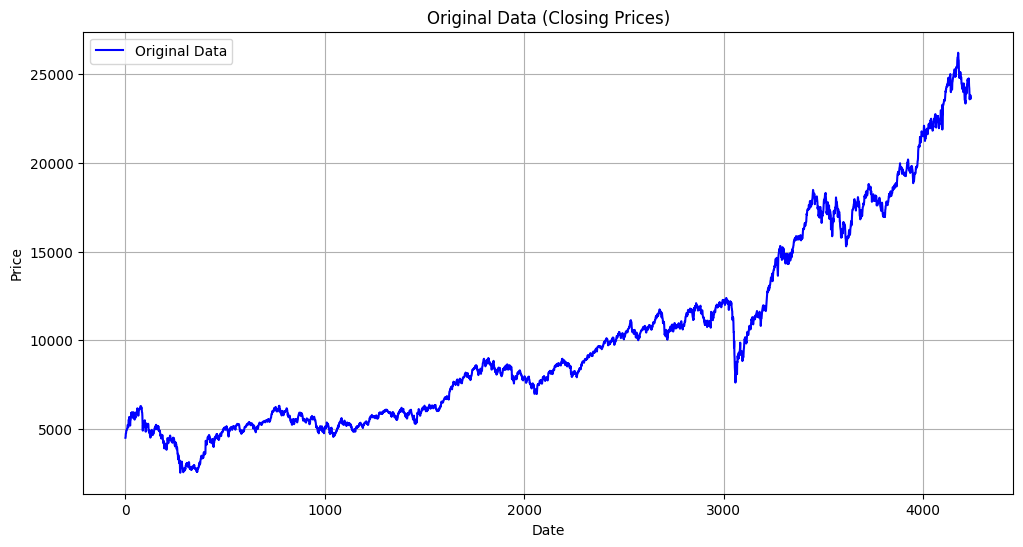

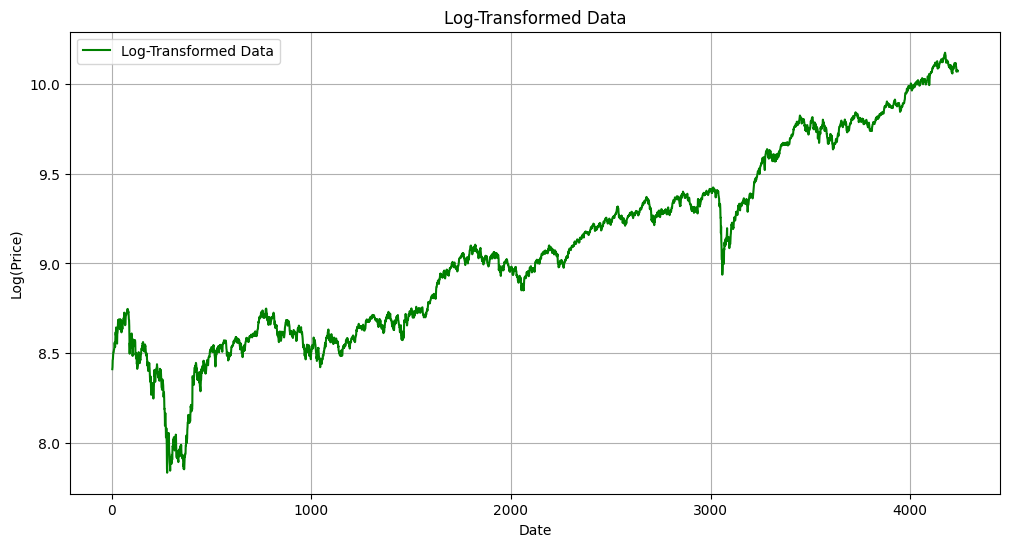

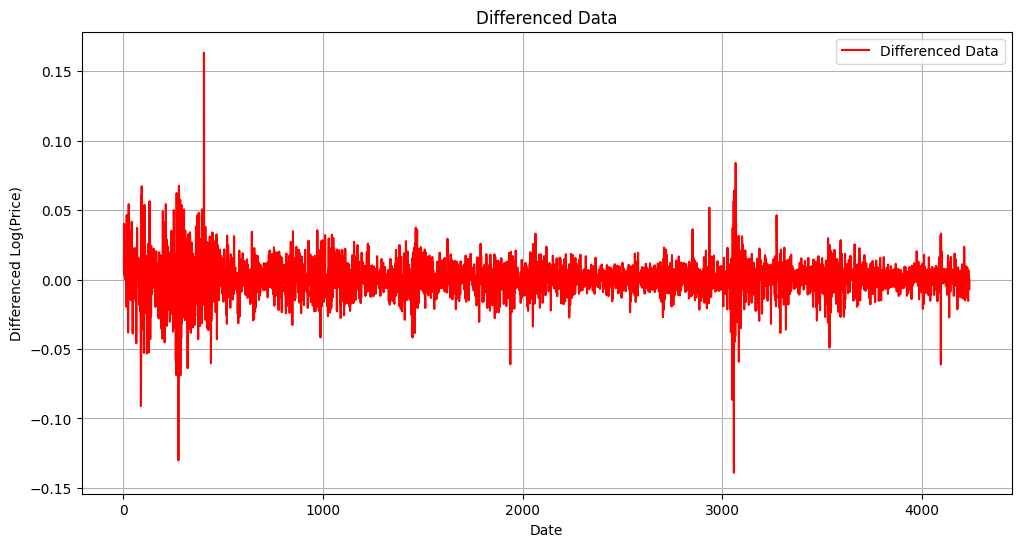

In [68]:
import matplotlib.pyplot as plt

# Original Data
plt.figure(figsize=(12, 6))
plt.plot(nifty50['Close'], label='Original Data', color='blue')
plt.title("Original Data (Closing Prices)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# Log-Transformed Data
plt.figure(figsize=(12, 6))
plt.plot(nifty50['Log_Close'], label='Log-Transformed Data', color='green')
plt.title("Log-Transformed Data")
plt.xlabel("Date")
plt.ylabel("Log(Price)")
plt.legend()
plt.grid()
plt.show()

# Differenced Data
plt.figure(figsize=(12, 6))
plt.plot(nifty50['Differenced'], label='Differenced Data', color='red')
plt.title("Differenced Data")
plt.xlabel("Date")
plt.ylabel("Differenced Log(Price)")
plt.legend()
plt.grid()
plt.show()


#### **2.2 Applying rolling statistics to check for stationarity of the data visually**

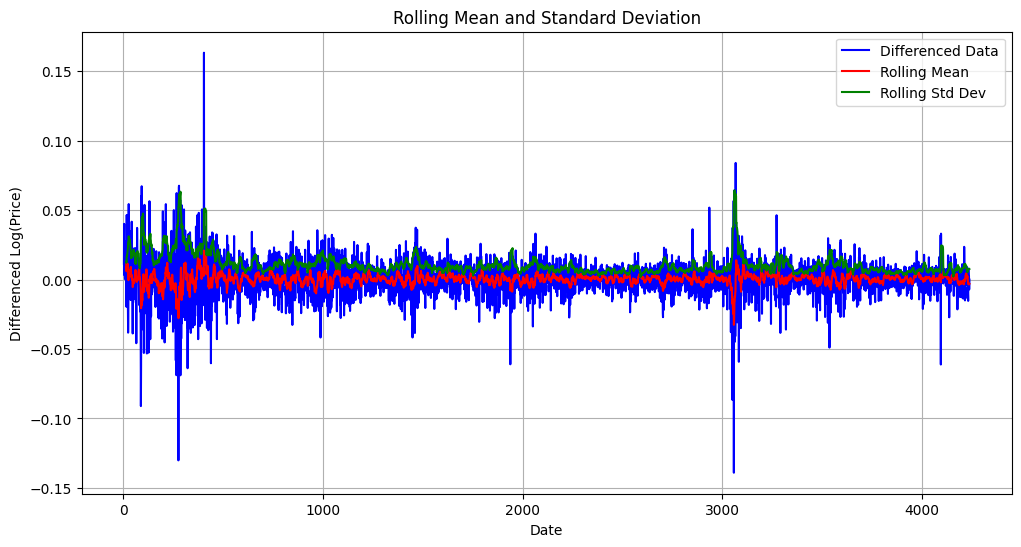

In [70]:
# Rolling Mean and Variance
rolling_mean = nifty50['Differenced'].rolling(window=12).mean()
rolling_std = nifty50['Differenced'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(nifty50['Differenced'], label='Differenced Data', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title("Rolling Mean and Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Differenced Log(Price)")
plt.legend()
plt.grid()
plt.show()


The data seems to be stationary after differencing as the rolling mean and rolling standard deviation are consistent over time  

In [71]:
# Convert the 'Price' column to datetime format
nifty50['Price'] = pd.to_datetime(nifty50['Price'], errors='coerce')

# Set 'Price' column as the index
nifty50.set_index('Price', inplace=True)

# Verify the index
print(nifty50.index)

# Add Month and Year columns
nifty50['Month'] = nifty50.index.month
nifty50['Year'] = nifty50.index.year


DatetimeIndex(['2007-09-17', '2007-09-18', '2007-09-19', '2007-09-20',
               '2007-09-21', '2007-09-24', '2007-09-25', '2007-09-26',
               '2007-09-27', '2007-09-28',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Price', length=4238, freq=None)


#### **2.3 visualizing the behaviour of nifty in Q4 compared to Q1 and Q2** 

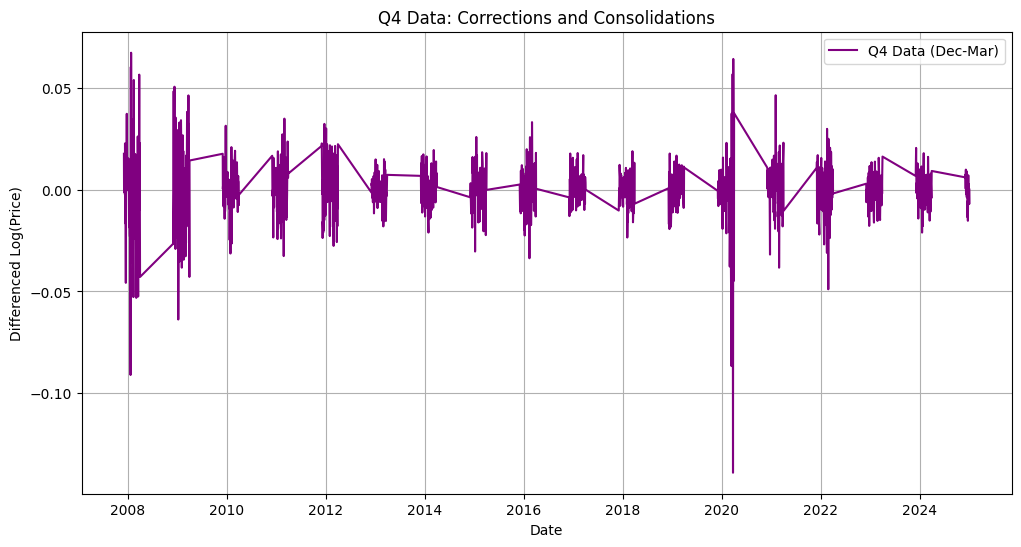

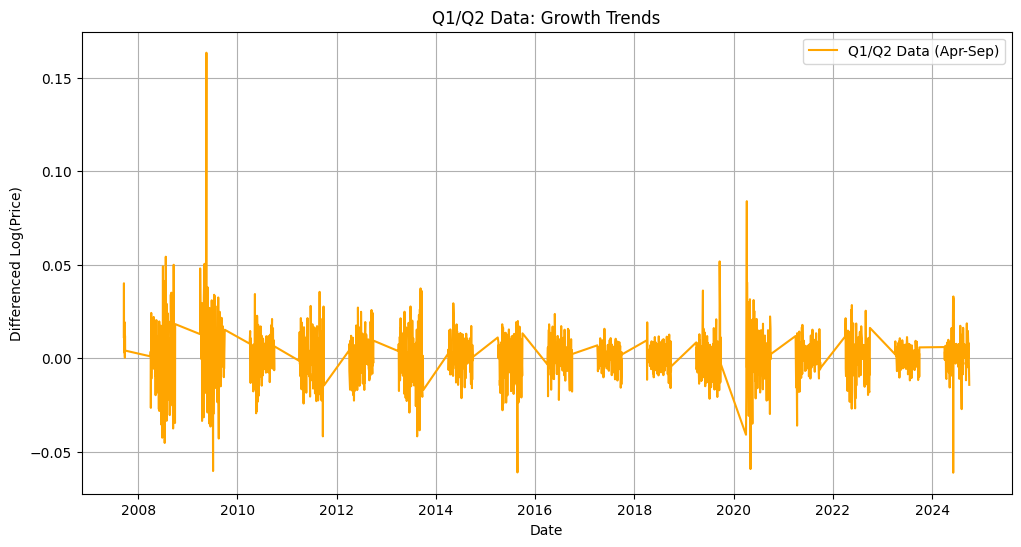

In [72]:

# Q4 Data (December–March)
q4_data = nifty50[(nifty50['Month'] == 12) | (nifty50['Month'] <= 3)]
plt.figure(figsize=(12, 6))
plt.plot(q4_data['Differenced'], label="Q4 Data (Dec-Mar)", color='purple')
plt.title("Q4 Data: Corrections and Consolidations")
plt.xlabel("Date")
plt.ylabel("Differenced Log(Price)")
plt.legend()
plt.grid()
plt.show()

# Q1/Q2 Data (April–September)
q1_q2_data = nifty50[(nifty50['Month'] >= 4) & (nifty50['Month'] <= 9)]
plt.figure(figsize=(12, 6))
plt.plot(q1_q2_data['Differenced'], label="Q1/Q2 Data (Apr-Sep)", color='orange')
plt.title("Q1/Q2 Data: Growth Trends")
plt.xlabel("Date")
plt.ylabel("Differenced Log(Price)")
plt.legend()
plt.grid()
plt.show()



#### **2.4 Plotting ACF and PACF graphs to configure the model**

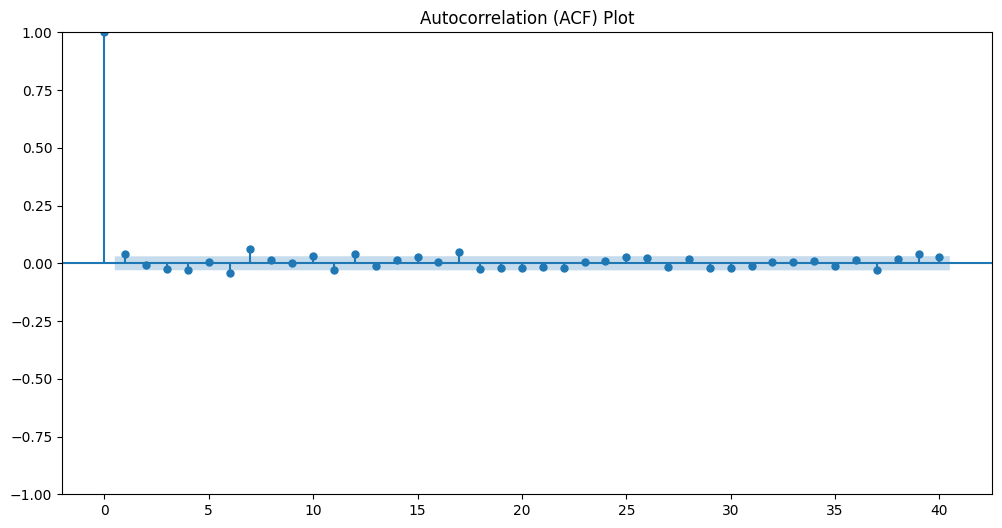

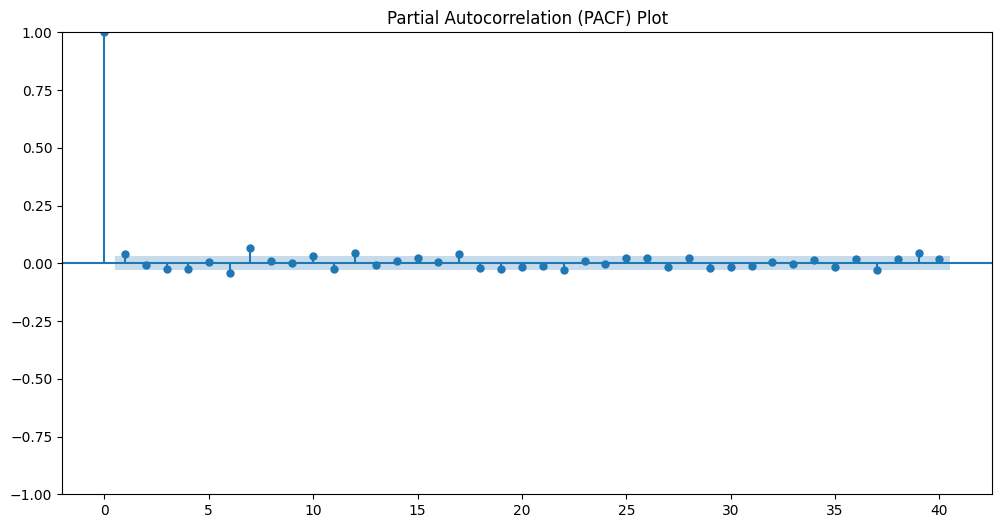

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF Plot
plt.figure(figsize=(12, 6))
plot_acf(nifty50['Differenced'].dropna(), lags=40, ax=plt.gca())
plt.title("Autocorrelation (ACF) Plot")
plt.show()

# PACF Plot
plt.figure(figsize=(12, 6))
plot_pacf(nifty50['Differenced'].dropna(), lags=40, ax=plt.gca())
plt.title("Partial Autocorrelation (PACF) Plot")
plt.show()


Based on the ACF and PACF graphs we can say that the the potential ARIMA configuration is ARIMA(1,1,0)

## **3. SEASONAL ARIMA MODEL FITTING** 

#### **3.1 Data preparation**

In [83]:
# Filter Q4 data (December–March)
q4_data = nifty50[(nifty50['Month'] == 12) | (nifty50['Month'] <= 3)]

# Filter Q1/Q2 data (April–September)
q1_q2_data = nifty50[(nifty50['Month'] >= 4) & (nifty50['Month'] <= 9)]

# Drop NA values for differenced data
q4_data = q4_data['Differenced'].dropna()
q1_q2_data = q1_q2_data['Differenced'].dropna()

# Reset the index
q4_data = q4_data.reset_index()
q1_q2_data = q1_q2_data.reset_index()

# Ensure the Price column is treated as a DateTimeIndex
q4_data['Price'] = pd.to_datetime(q4_data['Price'])
q1_q2_data['Price'] = pd.to_datetime(q1_q2_data['Price'])

# Set the index to the DateTimeIndex
q4_data.set_index('Price', inplace=True)
q1_q2_data.set_index('Price', inplace=True)

# Check the structure of the prepared data
print(q4_data.head())
print(q1_q2_data.head())


            Differenced
Price                  
2007-12-03     0.017588
2007-12-04    -0.001134
2007-12-05     0.013841
2007-12-06     0.002472
2007-12-07     0.003286
            Differenced
Price                  
2007-09-18     0.011404
2007-09-19     0.040130
2007-09-20     0.003207
2007-09-21     0.018780
2007-09-24     0.019377


#### **3.2 seasonal arima model fitting for Q4 and Q1, Q2 to compare the volatility and corrections**

Q4 SARIMA Model Summary:
                                      SARIMAX Results                                      
Dep. Variable:                         Differenced   No. Observations:                 1409
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                3708.553
Date:                             Sun, 12 Jan 2025   AIC                          -7409.107
Time:                                     16:39:26   BIC                          -7388.141
Sample:                                          0   HQIC                         -7401.268
                                            - 1409                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0153      0.018      0.841      0.401      -0.020       0.051
ma

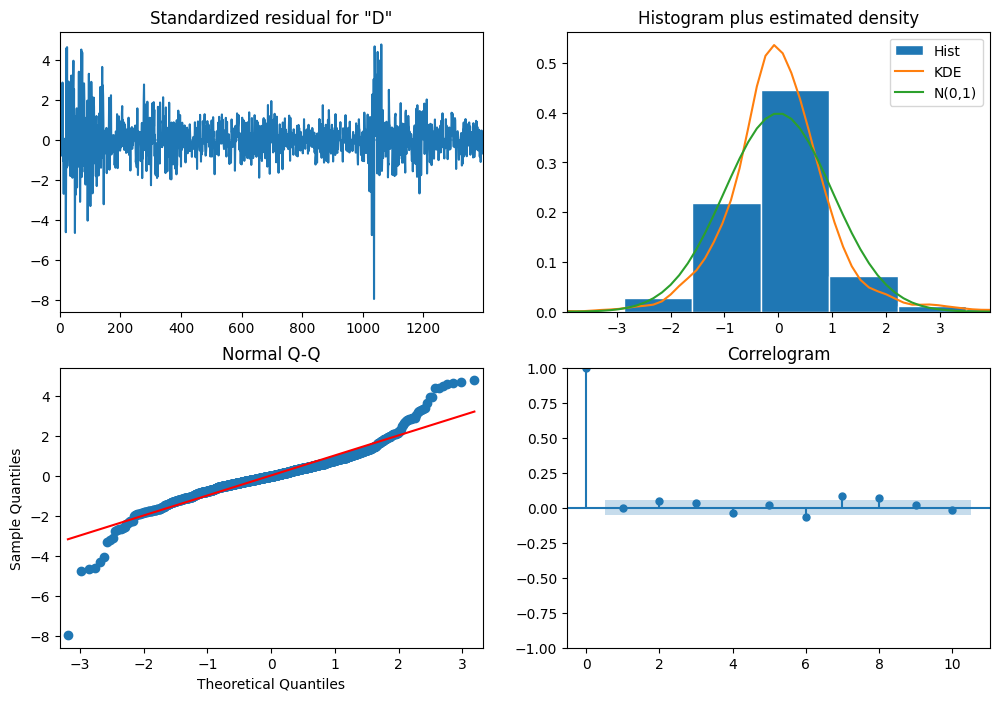

In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA for Q4
q4_model = SARIMAX(q4_data, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
q4_result = q4_model.fit()

# Print Q4 model summary
print("Q4 SARIMA Model Summary:")
print(q4_result.summary())

# Plot diagnostics for Q4
q4_result.plot_diagnostics(figsize=(12, 8))
plt.show()


### Inference for Q4 SARIMA Model Summary:

#### 1. Model Parameters
- The model is specified as **SARIMAX(1, 1, 1)x(1, 1, [], 12)**, where:
  - ARIMA parameters: \( p=1 \), \( d=1 \), \( q=1 \)
  - Seasonal parameters: \( P=1 \), \( D=1 \), \( Q=0 \), seasonal period = 12 (monthly seasonality)

#### 2. Coefficients
- **AR.L1 (Auto-regressive)**: Coefficient \( = 0.0153 \), with \( p\)-value \( = 0.401 \).
  - This indicates that the auto-regressive term's effect is not statistically significant at the 5% level.
- **MA.L1 (Moving average)**: Coefficient \( = -0.9996 \), with \( p\)-value \( = 0.000 \).
  - The moving average term is highly significant.
- **AR.S.L12 (Seasonal auto-regressive)**: Coefficient \( = -0.5081 \), with \( p\)-value \( = 0.000 \).
  - The seasonal auto-regressive term is also highly significant.

#### 3. Error Variance (\(\sigma^2\))
- \( \sigma^2 = 0.0003 \): Indicates the variance of residuals is quite low.

#### 4. Model Fit Statistics
- **Log-Likelihood**: \( 3708.553 \)
- **AIC (Akaike Information Criterion)**: \( -7409.107 \)
- **BIC (Bayesian Information Criterion)**: \( -7388.141 \)
- **HQIC**: \( -7401.268 \)
  - Lower AIC and BIC values indicate a better fit; these values suggest the model fits the data reasonably well.

#### 5. Diagnostic Tests
- **Ljung-Box Test (Q)**:
  - \( Q = 0.00 \), \( p = 0.96 \): Residuals are not significantly autocorrelated, implying the model captures most of the data's structure.
- **Jarque-Bera Test (JB)**:
  - \( JB = 2520.42 \), \( p = 0.00 \): Residuals deviate from normality, as the \( p \)-value is less than 0.05.
- **Heteroskedasticity (H)**:
  - \( H = 0.69 \): Indicates some evidence of heteroskedasticity (changing variance in residuals over time).

#### 6. Skewness and Kurtosis
- **Skewness**: \( 0.01 \): Residuals are nearly symmetric.
- **Kurtosis**: \( 9.58 \): Residuals have heavier tails than a normal distribution (leptokurtic).



Q1/Q2 SARIMA Model Summary:
                                      SARIMAX Results                                      
Dep. Variable:                         Differenced   No. Observations:                 2117
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                5820.302
Date:                             Sun, 12 Jan 2025   AIC                         -11632.604
Time:                                     16:39:46   BIC                         -11609.998
Sample:                                          0   HQIC                        -11624.325
                                            - 2117                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0269      0.017      1.602      0.109      -0.006       0.060

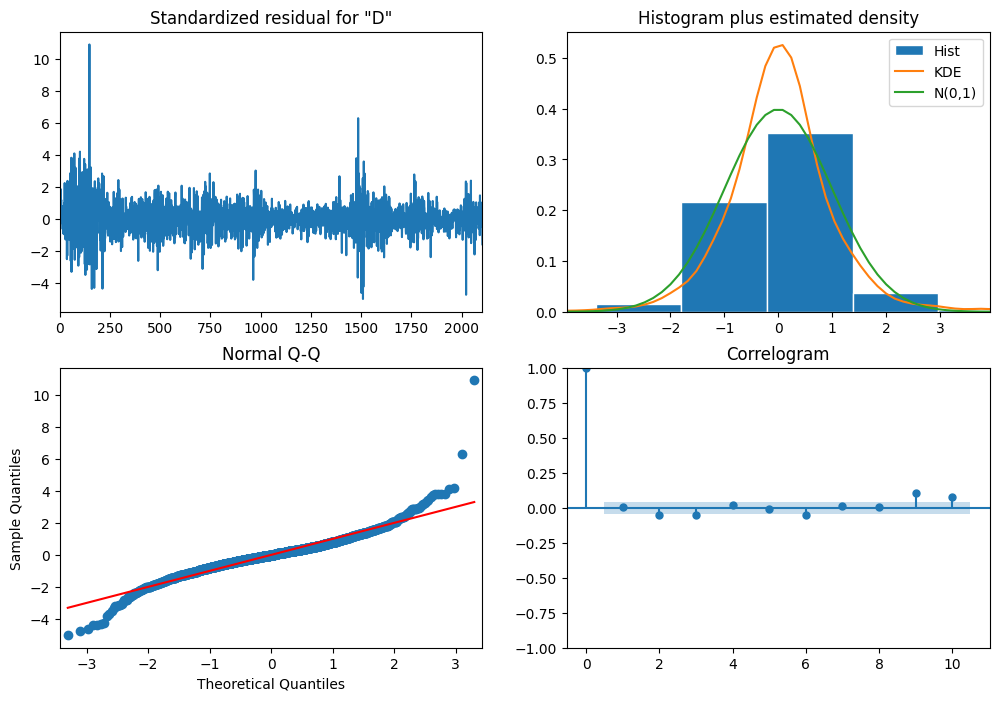

In [95]:
# Fit SARIMA for Q1/Q2 data
q1_q2_model = SARIMAX(q1_q2_data, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
q1_q2_result = q1_q2_model.fit()

# Print summary for Q1/Q2 SARIMA model
print("Q1/Q2 SARIMA Model Summary:")
print(q1_q2_result.summary())

# Diagnostic plots for Q1/Q2
q1_q2_result.plot_diagnostics(figsize=(12, 8))
plt.show()


In [86]:
# Metrics for Q4
print(f"Q4 AIC: {q4_result.aic}, Q4 BIC: {q4_result.bic}")

# Metrics for Q1/Q2
print(f"Q1/Q2 AIC: {q1_q2_result.aic}, Q1/Q2 BIC: {q1_q2_result.bic}")


Q4 AIC: -7409.106912707403, Q4 BIC: -7388.141447574114
Q1/Q2 AIC: -11632.604232648999, Q1/Q2 BIC: -11609.997850353568


#### Inference for Q1/Q2 and Comparison to Q4:

##### Q1/Q2 SARIMA Model Summary:
- **AIC**: -11632.604 and **BIC**: -11609.998 for the Q1/Q2 model indicate a better fit compared to the Q4 model (**AIC**: -7409.107, **BIC**: -7388.141).
- **Residual Diagnostics**:
  - The standardized residuals plot for Q1/Q2 shows smaller deviations from the mean compared to Q4, indicating better residual behavior and a more robust model fit.
  - The Normal Q-Q plot aligns more closely with the red diagonal line for Q1/Q2 compared to Q4, showing that residuals are more normally distributed.
  - The correlogram (ACF of residuals) for Q1/Q2 indicates that most residuals are within the confidence bands, suggesting minimal autocorrelation and a well-fit model. This is consistent with Q4 but slightly better in Q1/Q2.

##### Residual Histogram:
- The histogram of residuals for Q1/Q2 closely follows the normal distribution (indicated by the orange KDE line and green normal line). This contrasts slightly with Q4, where the histogram deviates more at the tails, indicating minor skewness in Q4 residuals.

##### Model Coefficients:
- The Q1/Q2 model shows significant values for the moving average term (`ma.L1: -0.9993`) and the seasonal autoregressive term (`ar.S.L12: -0.4939`), reflecting seasonal patterns and short-term dependencies.
- For Q4, the `ma.L1` term is also significant (`ma.L1: -0.9996`), but the seasonal autoregressive term (`ar.S.L12: -0.5081`) shows slightly higher impact in Q4 compared to Q1/Q2.

##### Comparison:
- The Q1/Q2 model demonstrates superior performance in terms of lower AIC and BIC values, suggesting a better overall fit.
- Residual diagnostics and histogram distribution indicate that the Q1/Q2 model captures the underlying data structure more effectively than the Q4 model.
- These findings align with the hypothesis, as Q1/Q2 trends are characterized by growth and a more stable market environment, resulting in a better-fitted model compared to Q4 corrections and consolidations.


## **4. FORECASTING DATA** 

c:\Users\ABHIRAM KULKARNI007\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


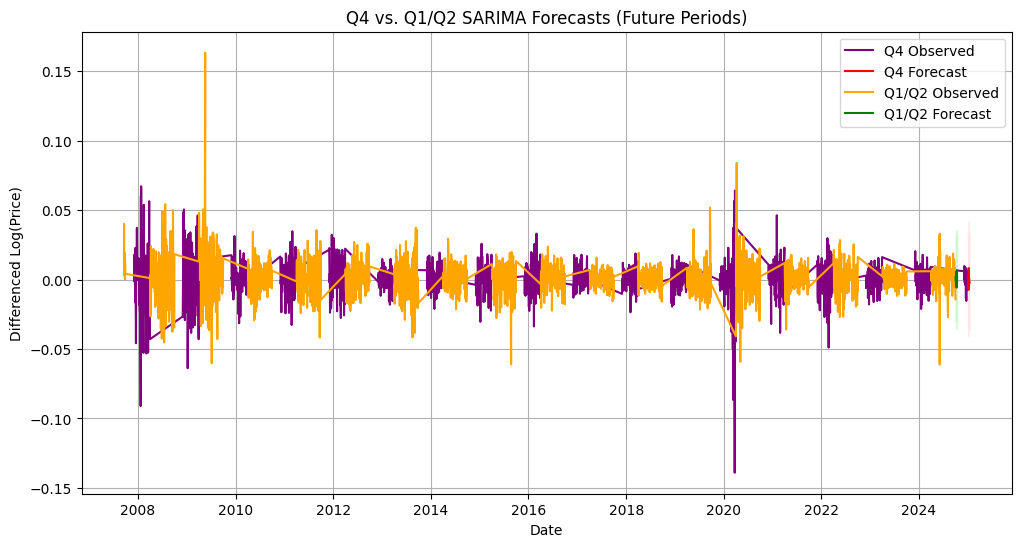

In [96]:
# Forecast steps (e.g., predict for the next 12 periods)
forecast_steps = 12

# Forecast for Q4
q4_forecast = q4_result.get_forecast(steps=forecast_steps)
q4_forecast_index = pd.date_range(start=q4_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq="D")
q4_forecast_values = q4_forecast.predicted_mean
q4_forecast_conf_int = q4_forecast.conf_int()

# Forecast for Q1/Q2
q1_q2_forecast = q1_q2_result.get_forecast(steps=forecast_steps)
q1_q2_forecast_index = pd.date_range(start=q1_q2_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq="D")
q1_q2_forecast_values = q1_q2_forecast.predicted_mean
q1_q2_forecast_conf_int = q1_q2_forecast.conf_int()

# Plot forecasts
plt.figure(figsize=(12, 6))

# Q4 observed data
plt.plot(q4_data.index, q4_data["Differenced"], label="Q4 Observed", color="purple")
plt.plot(q4_forecast_index, q4_forecast_values, label="Q4 Forecast", color="red")
plt.fill_between(q4_forecast_index, q4_forecast_conf_int.iloc[:, 0], q4_forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)

# Q1/Q2 observed data
plt.plot(q1_q2_data.index, q1_q2_data["Differenced"], label="Q1/Q2 Observed", color="orange")
plt.plot(q1_q2_forecast_index, q1_q2_forecast_values, label="Q1/Q2 Forecast", color="green")
plt.fill_between(q1_q2_forecast_index, q1_q2_forecast_conf_int.iloc[:, 0], q1_q2_forecast_conf_int.iloc[:, 1], color='lightgreen', alpha=0.3)

plt.title("Q4 vs. Q1/Q2 SARIMA Forecasts (Future Periods)")
plt.xlabel("Date")
plt.ylabel("Differenced Log(Price)")
plt.legend()
plt.grid()
plt.show()


##### Inference for the above forecasting:
the model succesfully predicts the Q1,Q2 and Q4 fluctuations which shows that the model is trained correctly.

## **5. MODEL VALIDATION**

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Validation for Q4
q4_actual = q4_data["Differenced"]
q4_predicted = q4_result.fittedvalues

# Calculate metrics for Q4
q4_mae = mean_absolute_error(q4_actual, q4_predicted)
q4_mse = mean_squared_error(q4_actual, q4_predicted)
q4_rmse = np.sqrt(q4_mse)

# Validation for Q1/Q2
q1_q2_actual = q1_q2_data["Differenced"]
q1_q2_predicted = q1_q2_result.fittedvalues

# Calculate metrics for Q1/Q2
q1_q2_mae = mean_absolute_error(q1_q2_actual, q1_q2_predicted)
q1_q2_mse = mean_squared_error(q1_q2_actual, q1_q2_predicted)
q1_q2_rmse = np.sqrt(q1_q2_mse)

# Display results
print("Q4 Model Validation Metrics:")
print(f"Mean Absolute Error (MAE): {q4_mae}")
print(f"Mean Squared Error (MSE): {q4_mse}")
print(f"Root Mean Squared Error (RMSE): {q4_rmse}\n")

print("Q1/Q2 Model Validation Metrics:")
print(f"Mean Absolute Error (MAE): {q1_q2_mae}")
print(f"Mean Squared Error (MSE): {q1_q2_mse}")
print(f"Root Mean Squared Error (RMSE): {q1_q2_rmse}")


Q4 Model Validation Metrics:
Mean Absolute Error (MAE): 0.01177048324886782
Mean Squared Error (MSE): 0.0002925688021424165
Root Mean Squared Error (RMSE): 0.01710464270724228

Q1/Q2 Model Validation Metrics:
Mean Absolute Error (MAE): 0.010664937201406191
Mean Squared Error (MSE): 0.0002328132151051825
Root Mean Squared Error (RMSE): 0.015258217953128816


### **Final Conclusion**:
From the analysis, we can draw the following conclusions:

1. **Seasonal Patterns**: The NIFTY 50 index exhibits clear seasonal trends, with distinct periods of corrections, consolidations, and rallies throughout the year.
   
2. **Q4 Behavior (December to March)**: During the fourth quarter, the market tends to undergo corrections and periods of consolidation, reflecting cautious investor sentiment and profit-booking tendencies.

3. **Q1 and Q2 Behavior (April to September)**: In contrast, the first and second quarters generally showcase upward momentum, with markets rallying and contributing to the robust 12% CAGR (Compound Annual Growth Rate) over the long term.

### **Investment Insight**:
These findings can serve as a valuable guide for investors in the Indian market. By understanding these seasonal patterns, investors can strategically plan their investments to capitalize on periods of market growth while navigating corrections with prudence.
